<a href="https://colab.research.google.com/github/GubioGL/Fundadamentos-da-computa-o-quantica/blob/main/Aula_3_deutsch_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qiskit Tutorial: Algoritmo de Deutsch.

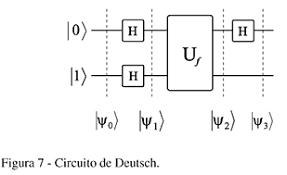

Vamos instalar as lib

In [1]:
#!pip install qiskit qiskit-aer

Agora iremos realizar o importe da biblioteca instalada

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

Primeiramente, vamos definir um circuito quântico que implementa uma porta oráculo para uma das quatro funções de um bit para um bit descritas anteriormente:

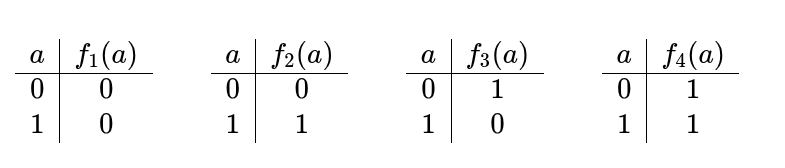.


É importante notar que a implementação da porta oráculo não faz parte do algoritmo de Deutsch em si. Aqui, estamos apenas demonstrando uma forma de preparar a entrada, implementando um circuito que atua como a porta oráculo(phase).

In [3]:
def deutsch_function(case: int):

    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    # criando o circuito
    f = QuantumCircuit(2)

    ##### funçao ########
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    ###################
    # retorna o circuito
    return f

Para visualizar o circuito, farremos :

In [4]:
# Para f1
deutsch_function(1).draw()

q_0: 
     
q_1:

In [5]:
# Para f2
deutsch_function(2).draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [6]:
# Para f3
deutsch_function(3).draw()

q_0: ──■───────
     ┌─┴─┐┌───┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [7]:
# Para f4
deutsch_function(4).draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

Relemebra essa funçao deve representar o oraculo ou uma caixa preta. Que é um funçao que nãpo sabemos como contruir ou qual a função

## Algorimo de deutsch

In [8]:
n = 2 # numero de qubits

qc = QuantumCircuit(n, n -1)
qc.draw()

q_0: 
     
q_1: 
     
c: 1/

In [9]:
# Preparar o segundo qubit |1>
qc.x(1)
qc.barrier()
qc.draw()

░ 
q_0: ──────░─
     ┌───┐ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════

In [10]:
# Transformar par ao estado  |+> e |- >
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw()

░ ┌───┐ ░ 
q_0: ──────░─┤ H ├─░─
     ┌───┐ ░ ├───┤ ░ 
q_1: ┤ X ├─░─┤ H ├─░─
     └───┘ ░ └───┘ ░ 
c: 1/════════════════

In [11]:
# Aplicar o oraculo
qc.compose(deutsch_function(4), inplace=True)
qc.barrier()
qc.draw()

░ ┌───┐ ░       ░ 
q_0: ──────░─┤ H ├─░───────░─
     ┌───┐ ░ ├───┤ ░ ┌───┐ ░ 
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├─░─
     └───┘ ░ └───┘ ░ └───┘ ░ 
c: 1/════════════════════════

In [12]:
# Medir na base  |+> e |- >
qc.h(0)
qc.measure(qubit=0, cbit=0)
qc.draw()

░ ┌───┐ ░       ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░───────░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ ┌───┐ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├─░───────╫─
     └───┘ ░ └───┘ ░ └───┘ ░       ║ 
c: 1/══════════════════════════════╩═
                                   0

In [13]:
result = AerSimulator().run(qc, shots=1, memory=True).result()
measurements = result.get_memory()
if measurements[0] == "0":
    print( "Constante")
else: print("Balanceado")

Constante


## O algoritmo Deutsch-Jozsa

Faça a implementaçao do algorimo de D-J.
Utiliza a fonte de referencia :https://quantum.cloud.ibm.com/learning/pt/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-jozsa-algorithm

In [30]:
import numpy as np

In [67]:
num_qubits = 3

In [68]:
def dj_query(num_qubits):
    qc = QuantumCircuit(num_qubits + 1)
 
    if np.random.randint(0, 2):
        # retorna Constante com 50% de chance
        print("Função Constante")
        return qc
 
    # Selecione metade das entradas
    on_states = np.random.choice(
        range(2**num_qubits),
        2**num_qubits // 2,
        replace=False,
    )
 
    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc
 
    for state in on_states:
        qc.barrier()
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")
 
    qc.barrier()
 
    print("Função Balanceada")
    return qc

In [69]:
print(dj_query(num_qubits))

Função Constante
     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     


In [76]:
qc = QuantumCircuit(num_qubits + 1, num_qubits)
print(qc)

     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
c: 3/
     


In [77]:
qc.x(num_qubits)
print(qc)

          
q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════
          


In [78]:
qc.h(range(num_qubits + 1))
print(qc)

     ┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════
               


In [84]:
qc.compose(dj_query(num_qubits), inplace=True)
print(qc)

Função Balanceada
     ┌───┐      ░ ┌───┐     ┌───┐ ░                 ░                 ░ ┌───┐»
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░────────■────────░────────■────────░─┤ X ├»
     ├───┤      ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ┌───┐  │  ┌───┐ ░ ├───┤»
q_1: ┤ H ├──────░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├»
     ├───┤      ░ ┌───┐  │  ┌───┐ ░ └───┘  │  └───┘ ░ ├───┤  │  ├───┤ ░ ├───┤»
q_2: ┤ H ├──────░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├»
     ├───┤┌───┐ ░ └───┘┌─┴─┐└───┘ ░      ┌─┴─┐      ░ └───┘┌─┴─┐└───┘ ░ └───┘»
q_3: ┤ X ├┤ H ├─░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░──────»
     └───┘└───┘ ░      └───┘      ░      └───┘      ░      └───┘      ░      »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«          ┌───┐ ░ 
«q_0: ──■──┤ X ├─░─
«       │  ├───┤ ░ 
«q_1: ──■──┤ X ├─░─
«       │  ├───┤ ░ 
«q_2: ──■──┤ 

In [85]:
qc.h(range(num_qubits))
qc.measure(range(num_qubits), range(num_qubits))
print(qc)

     ┌───┐      ░ ┌───┐     ┌───┐ ░                 ░                 ░ ┌───┐»
q_0: ┤ H ├──────░─┤ X ├──■──┤ X ├─░────────■────────░────────■────────░─┤ X ├»
     ├───┤      ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░ ┌───┐  │  ┌───┐ ░ ├───┤»
q_1: ┤ H ├──────░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├»
     ├───┤      ░ ┌───┐  │  ┌───┐ ░ └───┘  │  └───┘ ░ ├───┤  │  ├───┤ ░ ├───┤»
q_2: ┤ H ├──────░─┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ X ├»
     ├───┤┌───┐ ░ └───┘┌─┴─┐└───┘ ░      ┌─┴─┐      ░ └───┘┌─┴─┐└───┘ ░ └───┘»
q_3: ┤ X ├┤ H ├─░──────┤ X ├──────░──────┤ X ├──────░──────┤ X ├──────░──────»
     └───┘└───┘ ░      └───┘      ░      └───┘      ░      └───┘      ░      »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«          ┌───┐ ░ ┌───┐┌─┐      
«q_0: ──■──┤ X ├─░─┤ H ├┤M├──────
«       │  ├───┤ ░ ├───┤└╥┘┌─┐   
«q_1: ──■──┤ X ├─░─┤ H ├─╫─┤M

In [86]:
result = AerSimulator().run(qc, shots=1, memory=True).result()
measurements = result.get_memory()
if "1" in measurements[0]:
    print("Equilibrada")
else:
    print("Constante")

Equilibrada
